<a href="https://colab.research.google.com/github/Woosub-Kim/test_git/blob/master/05_Karas_%EA%B9%80%EC%9A%B0%EC%84%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## load MNIST data

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam

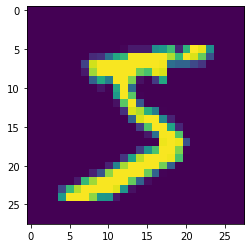

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

## 원래 x_train데이터는 0~255까지의 색 코드를 담고있는 
## 28 x 28 행렬 60000개를 담고있는 
## np.array이다(60000x28x28)

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
for i in range(3):
  print(x_train[i])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## 0~255까지 색깔보기

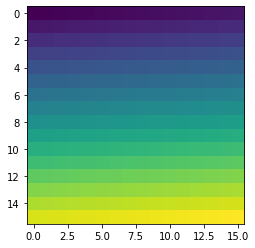

In [0]:
import numpy as np
image = np.array(list(x for x in range(256))).reshape(16,16)
plt.imshow(image)

## Create Model

In [0]:
model = Sequential()

In [0]:
num_classes = 10
model.add(Dense(512, activation='relu', input_shape=(784,))) # input layer
model.add(Dense(512, activation='relu')) # hidden layer1
model.add(Dense(num_classes, activation='softmax'))
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
# model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.00001), metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Model fit

In [0]:
import tensorflow as tf
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:

batch_size = 128
epochs = 10
# with tf.device('/device:GPU:0'):
# history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test), callbacks=[tbCallBack])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 3s 55us/step - loss: 1.7282 - acc: 0.6305 - val_loss: 1.1504 - val_acc: 0.8090
Epoch 2/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.8197 - acc: 0.8405 - val_loss: 0.5669 - val_acc: 0.8712
Epoch 3/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.4948 - acc: 0.8790 - val_loss: 0.4096 - val_acc: 0.8977
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.3900 - acc: 0.8972 - val_loss: 0.3456 - val_acc: 0.9080
Epoch 5/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.3390 - acc: 0.9080 - val_loss: 0.3083 - val_acc: 0.9164
Epoch 6/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.3072 - acc: 0.9156 - val_loss: 0.2844 - val_acc: 0.9222
Epoch 7/10
60000/60000 [==

In [0]:
  score = model.evaluate(x_test, y_test, verbose=0)
  print(model.metrics_names)
  print('test loss: ', score[0])
  print('test acc: ', score[1])

['loss', 'acc']
test loss:  0.2286375914245844
test acc:  0.9339


In [0]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## left keras logs

In [0]:
from keras import backend as K
from keras.callbacks import TensorBoard

LOG_DIR = 'drive/data/tb_logs'
	
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
	
import os
if not os.path.exists(LOG_DIR):
  os.makedirs(LOG_DIR)
	
get_ipython().system_raw('tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'.format(LOG_DIR))
	
get_ipython().system_raw('./ngrok http 6006 &')
	
!curl -s http://localhost:4040/api/tunnels | python3 -c \
"import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

tbCallBack = TensorBoard(
    log_dir=LOG_DIR, histogram_freq=1,
    write_graph=True,
    write_grads=True,
    batch_size=batch_size,
    write_images=True
)

with tf.device('/device:GPU:0'):
  history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test), callbacks=[tbCallBack])

--2020-03-04 05:54:19--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.227.168.133, 52.201.174.2, 50.17.165.171, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.227.168.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.3’

ngrok-stable-linux- 100%[===================>]  13.13M  14.0MB/s    in 0.9s    

2020-03-04 05:54:20 (14.0 MB/s) - ‘ngrok-stable-linux-amd64.zip.3’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   
https://711a9db1.ngrok.io
Train on 60000 samples, validate on 10000 samples




Epoch 1/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.2274 - acc: 0.9371 - val_loss: 0.2184 - val_acc: 0.9374

Epoch 2/10
60000/60000 [==============================] - 2s 37us/st

In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame(history.history)

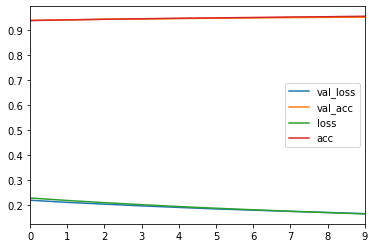

In [0]:
df = pd.DataFrame(history.history)
df.plot()

In [0]:
history.history

{'acc': [0.9370999999682108,
  0.9395500000317891,
  0.9420333333015442,
  0.9440833333651225,
  0.9462833333651225,
  0.94765,
  0.9492500000317892,
  0.9512666666348776,
  0.9522833333651225,
  0.9541666666666667],
 'loss': [0.22737287734349568,
  0.21742865818341572,
  0.2085715906023979,
  0.20059612621863684,
  0.19310847152868907,
  0.18638081984917323,
  0.18018879838784535,
  0.17427873318990073,
  0.16878442698717117,
  0.16364366029898325],
 'val_acc': [0.9374,
  0.9397,
  0.9421,
  0.943,
  0.9448,
  0.9465,
  0.9473,
  0.9487,
  0.9498,
  0.9505],
 'val_loss': [0.2183712172985077,
  0.20983006801605225,
  0.20272022205591203,
  0.1957892426133156,
  0.18961155593395232,
  0.1835458195269108,
  0.17869619890451433,
  0.17375004712343217,
  0.16946835255622864,
  0.16469463438987733]}

## 파라미터 조절하기 
#### compile의 lr값(학습률)
#### activation의 학습방법
#### compile의 loss

In [0]:
# compile과정의 lr값을 조정 학습률
model1 = Sequential()
model1.add(Dense (512, activation='relu', input_shape=(784,))) # input layer
model1.add(Dense(512, activation='relu')) # hidden layer1
model1.add(Dense(num_classes, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_test, y_test))

#add에서 activation을 모두 softmax 
model2 = Sequential()
model2.add(Dense (512, activation='softmax', input_shape=(784,))) # input layer
model2.add(Dense(512, activation='softmax')) # hidden layer1
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.00001), metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_test, y_test))

#add에서 activation을 모두 relu
model3 = Sequential()
model3.add(Dense (512, activation='relu', input_shape=(784,))) # input layer
model3.add(Dense(512, activation='relu')) # hidden layer1
model3.add(Dense(num_classes, activation='relu'))
model3.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.00001), metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_test, y_test))

#compile과정에서 loss 를 mean_squared_error
model4 = Sequential()
model4.add(Dense (512, activation='relu', input_shape=(784,))) # input layer
model4.add(Dense(512, activation='relu')) # hidden layer1
model4.add(Dense(num_classes, activation='softmax'))
model4.compile(loss='mean_squared_error', optimizer=RMSprop(lr=0.00001), metrics=['accuracy'])
history4 = model4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_test, y_test))


score1 = model1.evaluate(x_test, y_test, verbose=0)
score2 = model2.evaluate(x_test, y_test, verbose=0)
score3 = model3.evaluate(x_test, y_test, verbose=0)
score4 = model4.evaluate(x_test, y_test, verbose=0)

print(model1.metrics_names)
print('test loss: ', score1[0])
print('test acc: ', score1[1])

print(model2.metrics_names)
print('test loss: ', score2[0])
print('test acc: ', score2[1])

print(model3.metrics_names)
print('test loss: ', score3[0])
print('test acc: ', score3[1])

print(model4.metrics_names)
print('test loss: ', score4[0])
print('test acc: ', score4[1])



['loss', 'acc']
test loss:  0.11290730886588217
test acc:  0.9805
['loss', 'acc']
test loss:  2.301802775192261
test acc:  0.1135
['loss', 'acc']
test loss:  1.0921153957953678
test acc:  0.7785
['loss', 'acc']
test loss:  0.010363718561944553
test acc:  0.9363


## 결론
###### 1. lr 0.00001=>0.001 성적좋아짐
###### 2,3activation을 하나로 통일해서는 안됨
###### 4. loss를 바꾸는것은 경우에 따라 가능함

## 참고

### activation : 활성화 함수 설정합니다.
###### linear’ : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다.
###### relu : rectifier 함수, 은닉층에 주로 쓰입니다.
###### sigmoid : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
###### softmax : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.

## loss손실 함수, 모델이 최적화에 사용되는 목적 함수입니다. 
###### categorical_crossentropy 
###### mse .....

## lr 학습률


## sklearn의 classification을 활용한다면??

In [0]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
pred = tree.predict(x_test)
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.96      0.96      0.96      1135
           2       0.87      0.86      0.86      1032
           3       0.83      0.86      0.84      1010
           4       0.87      0.88      0.88       982
           5       0.83      0.84      0.83       892
           6       0.89      0.89      0.89       958
           7       0.91      0.90      0.90      1028
           8       0.82      0.80      0.81       974
           9       0.86      0.85      0.85      1009

   micro avg       0.88      0.88      0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000
 samples avg       0.88      0.88      0.88     10000



In [0]:
pred

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# 이미지 처리도 비교적 간단한 케이스라면 
# 일반 싸이킷런 머신러닝으로 할 수 있다?? 